# Module

In [50]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

plt.style.use("ggplot")
pd.set_option("display.max_columns", 50)

# Data

In [3]:
data_path = "./data/"

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

In [4]:
train.shape, test.shape

((300000, 25), (200000, 24))

In [5]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [7]:
train.dtypes

id         int64
bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [8]:
train.loc[0].values

array([0, 0, 0, 0, 'T', 'Y', 'Green', 'Triangle', 'Snake', 'Finland',
       'Bassoon', '50f116bcf', '3ac1b8814', '68f6ad3e9', 'c389000ab',
       '2f4cb3d51', 2, 'Grandmaster', 'Cold', 'h', 'D', 'kr', 2, 2, 0],
      dtype=object)

In [9]:
def resumetable(df):
    df = df.drop(['id'], axis=1, errors='ignore')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])
    summary = summary.reset_index().rename(columns={'index':'피쳐'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values
    summary['세번째 값'] = df.loc[2].values
    return summary


resumetable(train)

,피쳐,데이터타입,결측값 개수,고유값 개수,첫번째 값,두번째 값,세번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [10]:
resumetable(test)

,피쳐,데이터타입,결측값 개수,고유값 개수,첫번째 값,두번째 값,세번째 값
0,bin_0,int64,0,2,0,0,1
1,bin_1,int64,0,2,0,0,0
2,bin_2,int64,0,2,1,0,1
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,N,Y
5,nom_0,object,0,3,Blue,Red,Blue
6,nom_1,object,0,6,Triangle,Square,Square
7,nom_2,object,0,6,Axolotl,Lion,Dog
8,nom_3,object,0,6,Finland,Canada,China
9,nom_4,object,0,4,Piano,Piano,Piano


In [11]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'Value of {feature} : {train[feature].unique()}')

Value of ord_0 : [2 1 3]
Value of ord_1 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
Value of ord_2 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


- 순서형 피쳐의 순서
    - ord_0 : 1, 2, 3
    - ord_1 : Novice, Contributor, Expert, Master, Grandmaster
    - ord_2 : Freezing, Cold, Warm, Hot, Boiling Hot, Lava Hot

In [12]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'Value of {feature} : {train[feature].unique()}')

Value of ord_3 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
Value of ord_4 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
Value of ord_5 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'

- ord_3, ord_4, ord_5는 알파벳 순서로 인코딩

# Viz

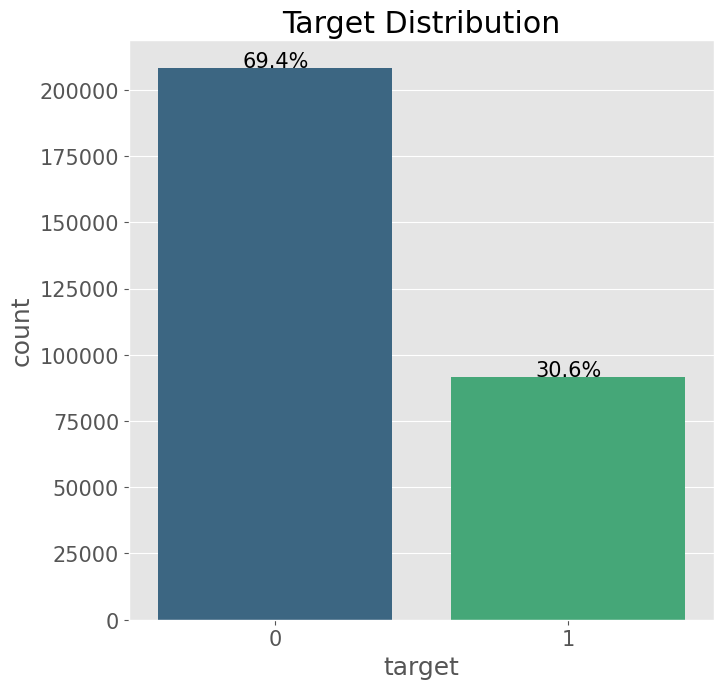

In [46]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        if height > 0:
            ax.text(
                x=left_coord + width/2.0,
                y=height + total_size*0.001,
                s=f'{percent:1.1f}%',
                ha='center'
            )


mpl.rc('font', size=15)
fig, axes = plt.subplots()
plt.tight_layout()
fig.set_size_inches(7, 7)

sns.countplot(x='target', data=train, hue='target', palette='viridis', legend=False)
write_percent(axes, len(train))
axes.set(title='Target Distribution')
plt.show()

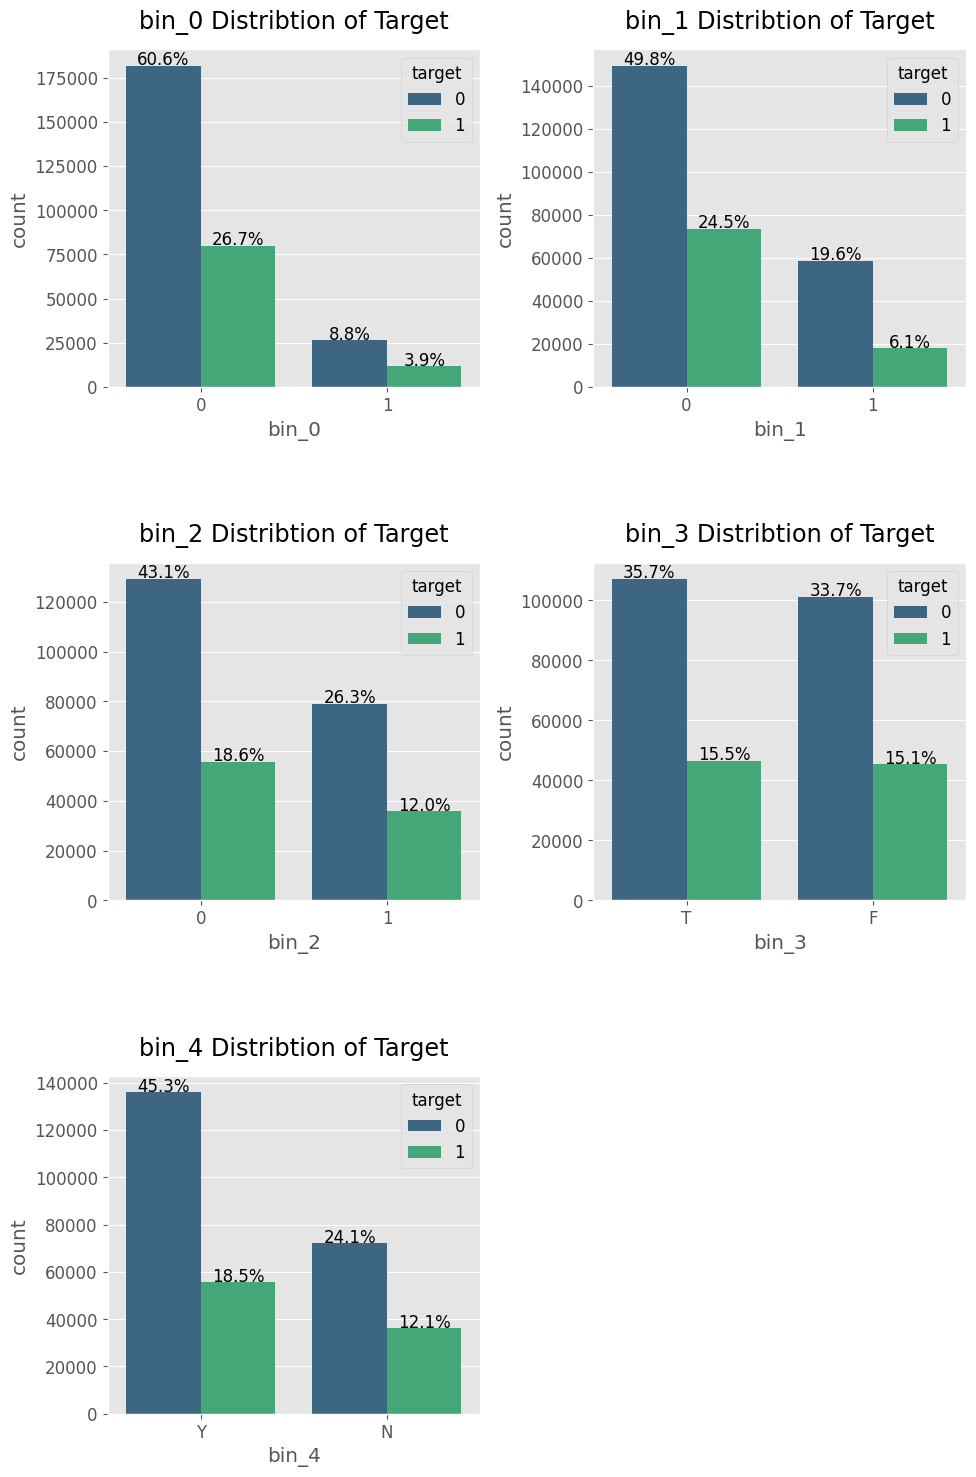

In [47]:
mpl.rc('font', size=12)
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
fig.set_size_inches(10, 16)


features_to_plot = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
for feature, ax in zip(features_to_plot, axes.flatten()):
    sns.countplot(x=feature, data=train, hue='target', palette='viridis', ax=ax)
    ax.set_title(f'{feature} Distribtion of Target', pad=15)
    write_percent(ax, len(train))

axes.flatten()[5].axis('off')
plt.show()

In [18]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index') * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [19]:
crosstab.reset_index()

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [20]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

crosstab = get_crosstab(train, 'nom_0')
print(crosstab)

target  nom_0          0          1
0        Blue  75.820976  24.179024
1       Green  67.285478  32.714522
2         Red  64.894827  35.105173


In [43]:
def plot_pointplot(ax, feature, tab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data=tab, order=tab[feature].values,
                        color='black', legend=False)
    ax2.set_ylim(tab[1].min()-5, tab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')    
    

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    mpl.rc('font', size=15)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=size)
    
    for feature, ax in zip(features, axes.flatten()):
        tab = get_crosstab(df, feature)
        sns.countplot(x=feature, data=df, order=tab[feature].values, ax=ax)
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, tab)
        ax.set_title(f'{feature} Distribtion', pad=20)

    for i in range(len(features), len(axes.flatten())):
        axes.flatten()[i].axis('off')
    plt.tight_layout(pad=3.0)
    plt.show()

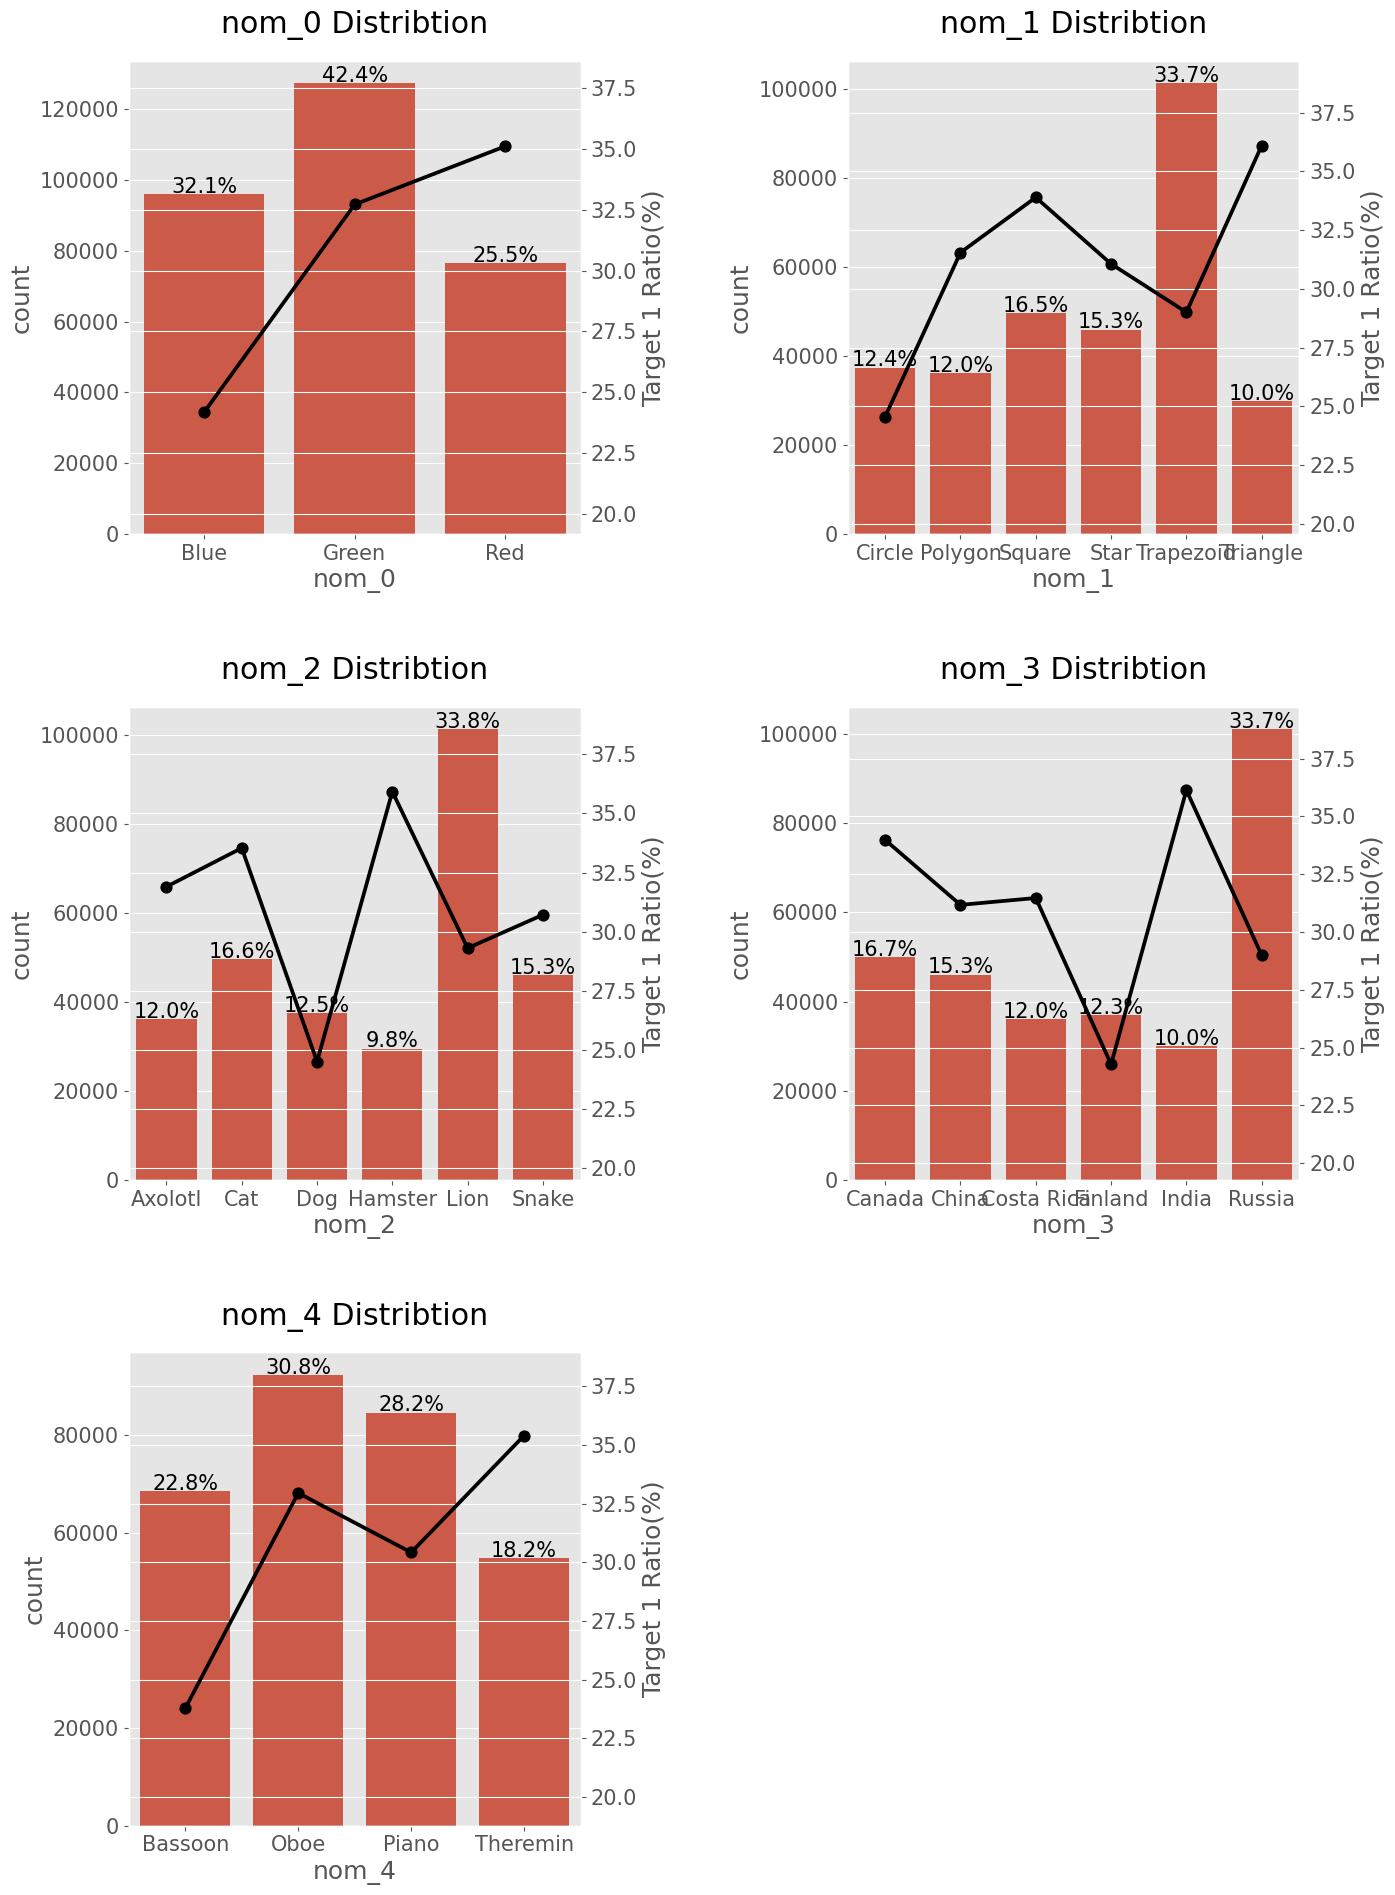

In [48]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, 3, 2)

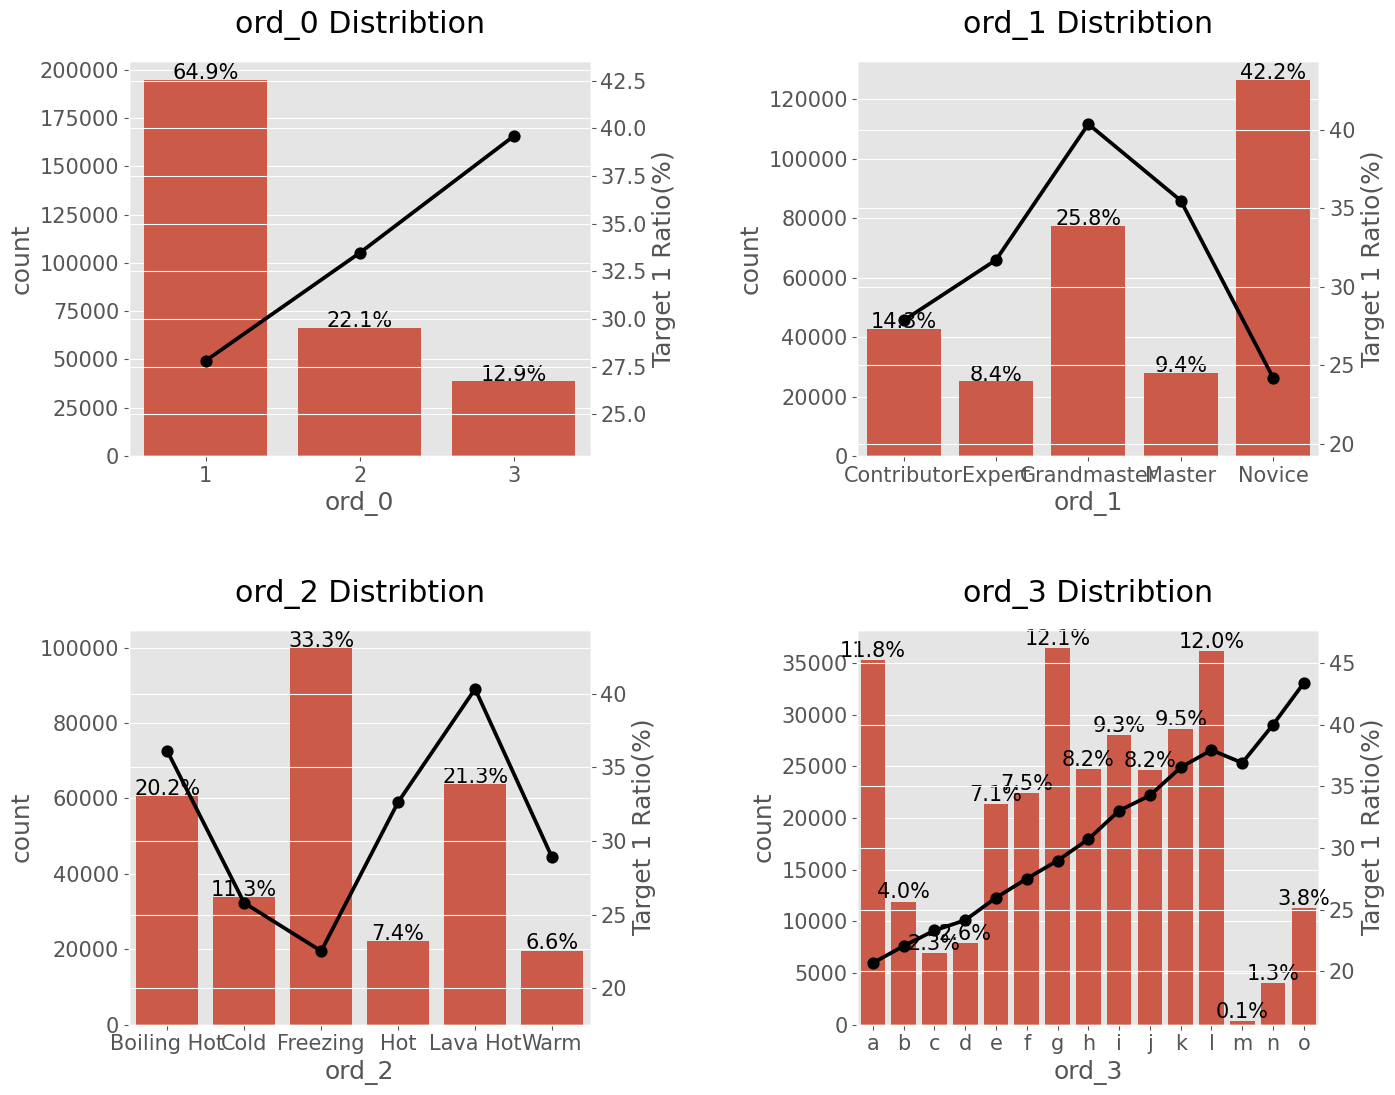

In [49]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

In [51]:
ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

In [54]:
ord_1_dtype

CategoricalDtype(categories=['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'], ordered=True, categories_dtype=object)

In [55]:
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      300000 non-null  int64   
 1   bin_0   300000 non-null  int64   
 2   bin_1   300000 non-null  int64   
 3   bin_2   300000 non-null  int64   
 4   bin_3   300000 non-null  object  
 5   bin_4   300000 non-null  object  
 6   nom_0   300000 non-null  object  
 7   nom_1   300000 non-null  object  
 8   nom_2   300000 non-null  object  
 9   nom_3   300000 non-null  object  
 10  nom_4   300000 non-null  object  
 11  nom_5   300000 non-null  object  
 12  nom_6   300000 non-null  object  
 13  nom_7   300000 non-null  object  
 14  nom_8   300000 non-null  object  
 15  nom_9   300000 non-null  object  
 16  ord_0   300000 non-null  int64   
 17  ord_1   300000 non-null  category
 18  ord_2   300000 non-null  category
 19  ord_3   300000 non-null  object  
 20  ord_4   300000 non-null  o

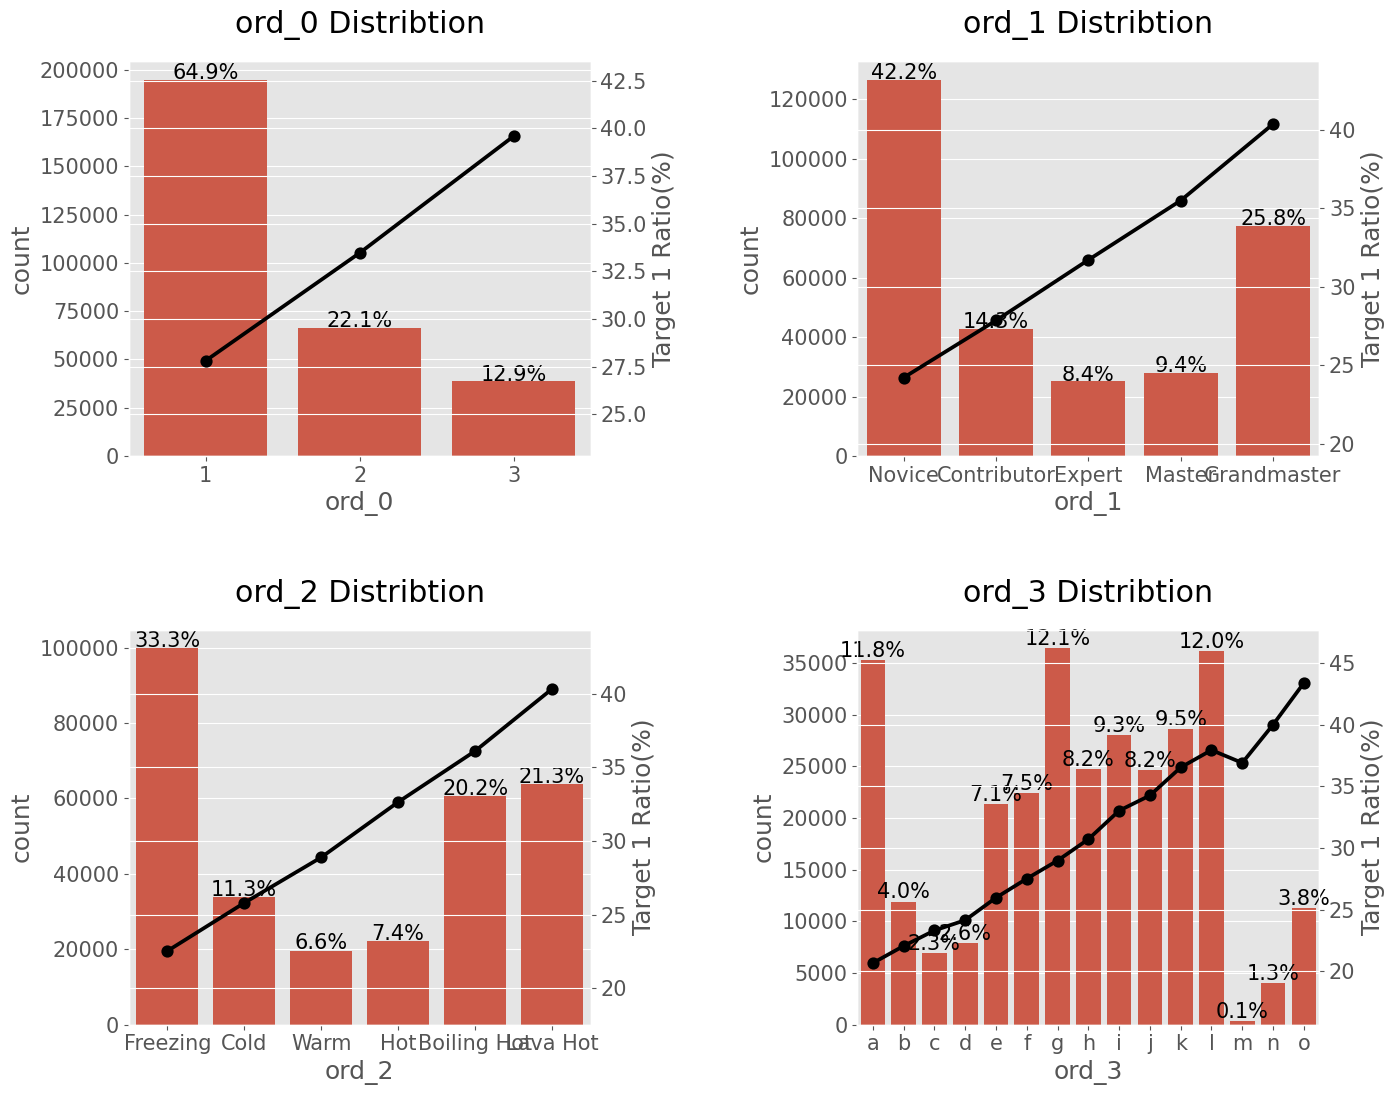

In [56]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

- 고유값의 순서에 따라 타겟값 1의 비율이 증가하는 경향을 보임

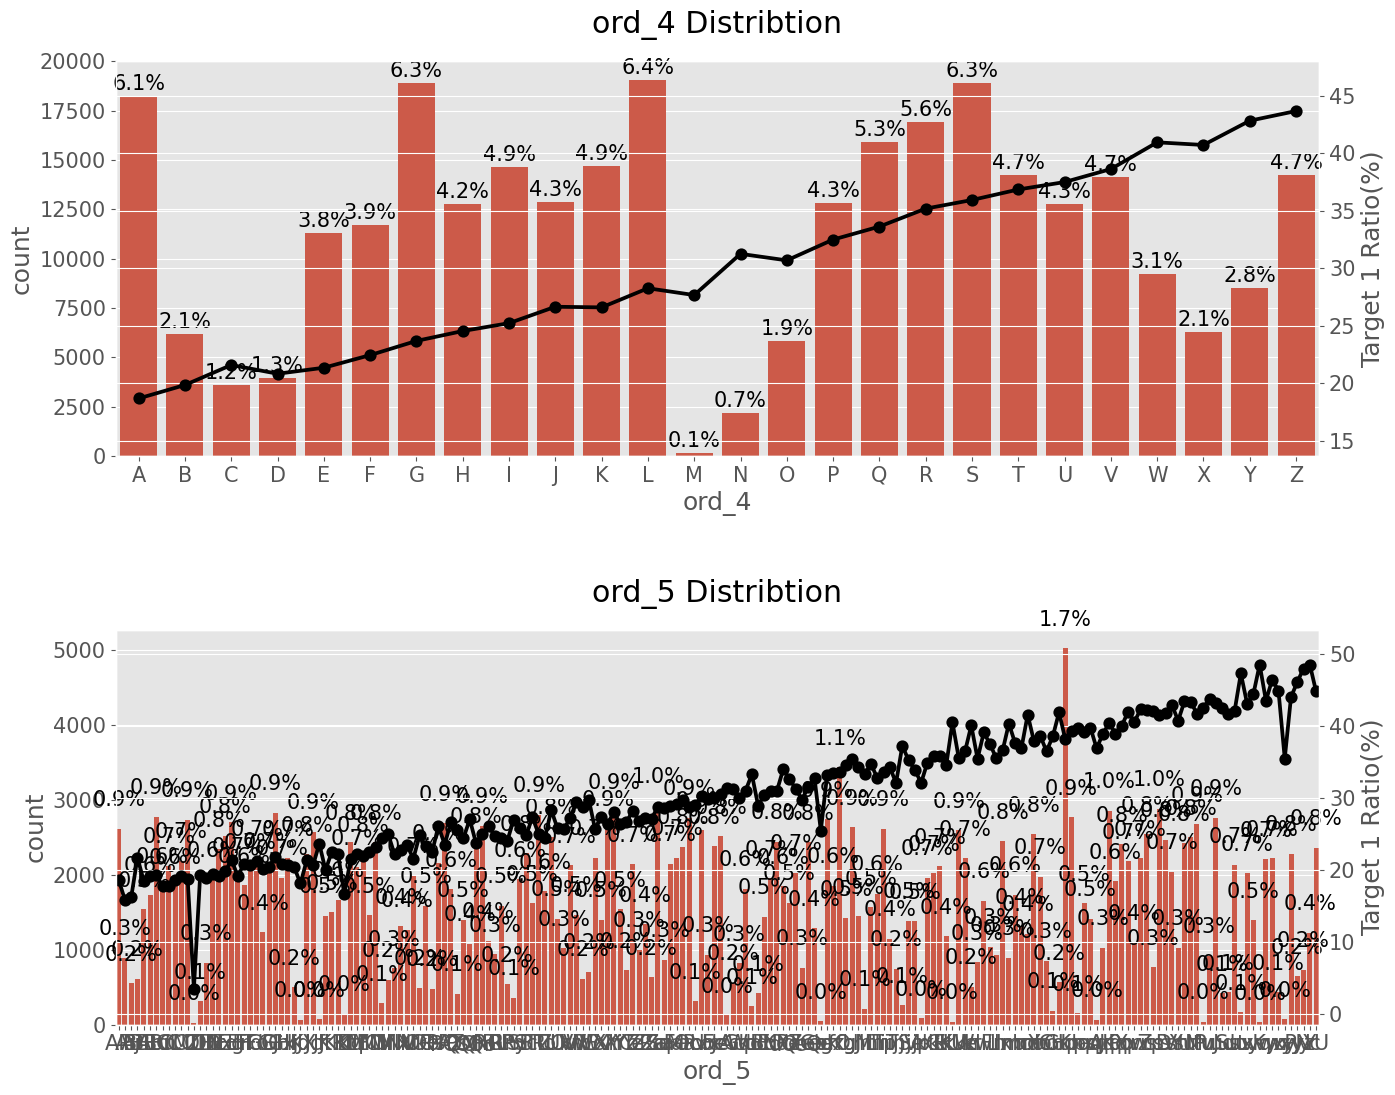

In [57]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15, 12))

- 앞선 순서형 피쳐처럼 고유값 순서에 따라 타겟값 1의 비율이 증가하는 경향이 있음

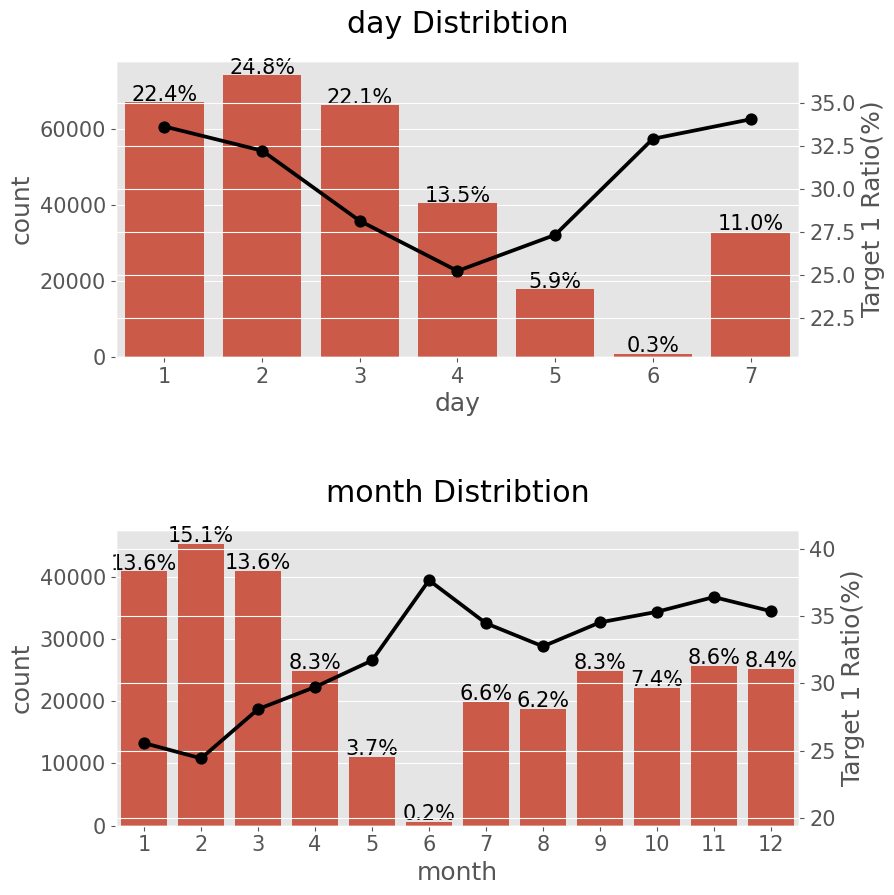

In [58]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10, 10))